[ 1.04930431  0.86609917  0.5511346  ..., -0.29839747 -1.7807711
 -1.52843117] 	


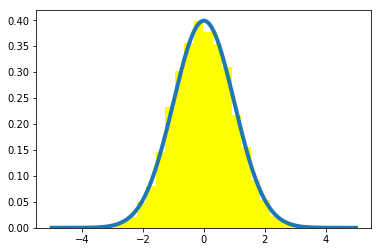

In [7]:
import matplotlib.pyplot as plt  
import numpy as np  
  
  
random_state = np.random.RandomState(19680801)  
X = random_state.randn(10000)  
print(X,'\t')
fig, ax = plt.subplots()  
ax.hist(X, bins=25, normed=True, color = 'yellow')  
x = np.linspace(-5, 5, 1000)  
ax.plot(x, 1 / np.sqrt(2*np.pi) * np.exp(-(x**2)/2), linewidth=4)  
plt.show()  

[    0     0     0     0     0     0     0     0     4     8    17    54
    68    51    38    26    38    38    42    53    74    91    79   100
   139   163   200   190   223   228   193   219   209   230   258   249
   261   252   264   253   242   239   254   253   252   237   266   267
   321   304   354   356   443   396   456   515   479   541   556   595
   691   761   860   882   921  1031  1047  1186  1250  1373  1509  1534
  1514  1449  1570  1805  1882  1845  2048  1951  1846  1767  1854  2113
  2439  2921  3715  5850  8330 11097 12148 12200 12464 12534 12454 14547
 15570 14558 11707  8954  7380  5698  5134  4946  4584  4054  4382  4315
  3745  3752  2941  1980  1563  1374  1220  1099   937   894   810   830
   777   796   775   772   804   786   747   682   650   684   625   633
   633   629   674   628   492   444   475   448   438   452   481   491
   483   471   484   592   625   671   769   911  1983  4659  5934  5290
  5819  5691  6071  5994  6870  6911  5565  3876  4

(<matplotlib.axes._subplots.AxesSubplot at 0x137b8f60>,
 [<matplotlib.lines.Line2D at 0x13a293c8>])

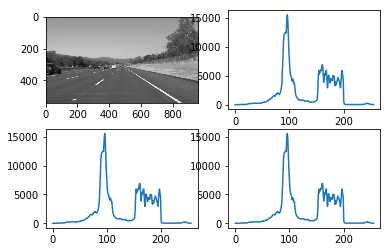

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('test.jpg',0) #直接读为灰度图像
#opencv方法读取-cv2.calcHist（速度最快）
#图像，通道[0]-灰度图，掩膜-无，灰度级，像素范围
hist_cv = cv2.calcHist([img],[0],None,[256],[0,256])
#numpy方法读取-np.histogram()
hist_np,bins = np.histogram(img.ravel(),256,[0,256])
#numpy的另一种方法读取-np.bincount()（速度=10倍法2）
hist_np2 = np.bincount(img.ravel(),minlength=256)
print(hist_np,'\n下一行\n',bins)
plt.subplot(221),plt.imshow(img,'gray')
plt.subplot(222),plt.plot(hist_cv)
plt.subplot(223),plt.plot(hist_np)
plt.subplot(224),plt.plot(hist_np2)

(<matplotlib.axes._subplots.AxesSubplot at 0x13af1198>,
 [<matplotlib.lines.Line2D at 0x15131940>])

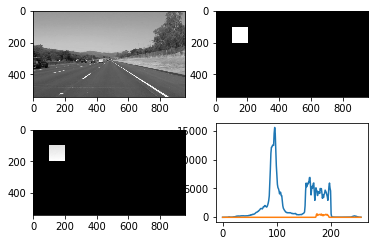

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('test.jpg',0) #直接读为灰度图像
mask = np.zeros(img.shape[:2],np.uint8)
mask[100:200,100:200] = 255
masked_img = cv2.bitwise_and(img,img,mask=mask) 

#opencv方法读取-cv2.calcHist（速度最快）
#图像，通道[0]-灰度图，掩膜-无，灰度级，像素范围
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221),plt.imshow(img,'gray')
plt.subplot(222),plt.imshow(mask,'gray')
plt.subplot(223),plt.imshow(masked_img,'gray')
plt.subplot(224),plt.plot(hist_full),plt.plot(hist_mask)

(<matplotlib.axes._subplots.AxesSubplot at 0x152c1ba8>,
 <matplotlib.image.AxesImage at 0x1534e128>)

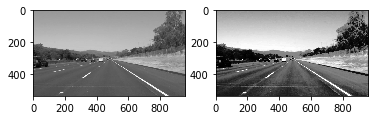

In [13]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('test.jpg',0) #直接读为灰度图像
res = cv2.equalizeHist(img)

plt.subplot(121),plt.imshow(img,'gray')
plt.subplot(122),plt.imshow(res,'gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x7efde80>,
 <matplotlib.image.AxesImage at 0x151cc240>)

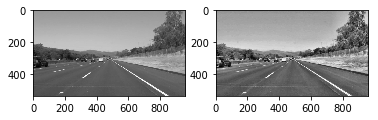

In [16]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('test.jpg',0) #直接读为灰度图像
clahe = cv2.createCLAHE(clipLimit=2,tileGridSize=(10,10))
cl1 = clahe.apply(img)

plt.subplot(121),plt.imshow(img,'gray')
plt.subplot(122),plt.imshow(cl1,'gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x7dba8d0>,
 Text(0.5,1,'center'))

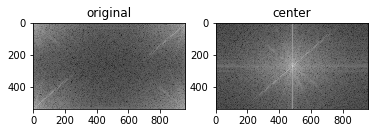

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('test.jpg',0) #直接读为灰度图像
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
#取绝对值：将复数变化成实数
#取对数的目的为了将数据变化到较小的范围（比如0-255）
s1 = np.log(np.abs(f))
s2 = np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(s1,'gray'),plt.title('original')
plt.subplot(122),plt.imshow(s2,'gray'),plt.title('center')

(<matplotlib.axes._subplots.AxesSubplot at 0x159aadd8>,
 Text(0.5,1,'center'))

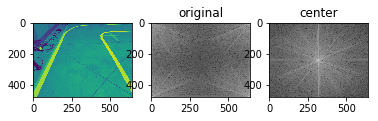

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('t0.jpg',0) #直接读为灰度图像
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
#取绝对值：将复数变化成实数
#取对数的目的为了将数据变化到较小的范围（比如0-255）
s1 = np.log(np.abs(f))
s2 = np.log(np.abs(fshift))
plt.subplot(131),plt.imshow(img)
plt.subplot(132),plt.imshow(s1,'gray'),plt.title('original')
plt.subplot(133),plt.imshow(s2,'gray'),plt.title('center')

(<matplotlib.axes._subplots.AxesSubplot at 0x16347978>,
 Text(0.5,1,'center'))

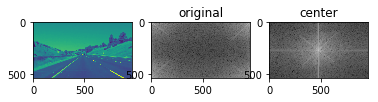

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('4.jpg',0) #直接读为灰度图像
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
#取绝对值：将复数变化成实数
#取对数的目的为了将数据变化到较小的范围（比如0-255）
s1 = np.log(np.abs(f))
s2 = np.log(np.abs(fshift))
plt.subplot(131),plt.imshow(img)
plt.subplot(132),plt.imshow(s1,'gray'),plt.title('original')
plt.subplot(133),plt.imshow(s2,'gray'),plt.title('center')

TypeError: slice indices must be integers or None or have an __index__ method

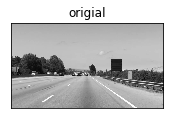

In [27]:
#高通滤波
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_man = cv2.imread('1.jpg',0) #直接读为灰度图像
plt.subplot(121),plt.imshow(img_man,'gray'),plt.title('origial')
plt.xticks([]),plt.yticks([])
#--------------------------------
rows,cols = img_man.shape
mask = np.ones(img_man.shape,np.uint8)
mask[rows/2-30:rows/2+30,cols/2-30:cols/2+30] = 0
#--------------------------------
f1 = np.fft.fft2(img_man)
f1shift = np.fft.fftshift(f1)
f1shift = f1shift*mask
f2shift = np.fft.ifftshift(f1shift) #对新的进行逆变换
img_new = np.fft.ifft2(f2shift)
#出来的是复数，无法显示
img_new = np.abs(img_new)
#调整大小范围便于显示
img_new = (img_new-np.amin(img_new))/(np.amax(img_new)-np.amin(img_new))
plt.subplot(122),plt.imshow(img_new,'gray'),plt.title('Highpass')
plt.xticks([]),plt.yticks([])

TypeError: slice indices must be integers or None or have an __index__ method

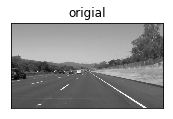

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_man = cv2.imread('test.jpg',0) #直接读为灰度图像
plt.subplot(121),plt.imshow(img_man,'gray'),plt.title('origial')
plt.xticks([]),plt.yticks([])
#--------------------------------
rows,cols = img_man.shape
mask1 = np.ones(img_man.shape,np.uint8)
mask1[rows/2-8:rows/2+8,cols/2-8:cols/2+8] = 0
mask2 = np.zeros(img_man.shape,np.uint8)
mask2[rows/2-80:rows/2+80,cols/2-80:cols/2+80] = 1
mask = mask1*mask2
#--------------------------------
f1 = np.fft.fft2(img_man)
f1shift = np.fft.fftshift(f1)
f1shift = f1shift*mask
f2shift = np.fft.ifftshift(f1shift) #对新的进行逆变换
img_new = np.fft.ifft2(f2shift)
#出来的是复数，无法显示
img_new = np.abs(img_new)
#调整大小范围便于显示
img_new = (img_new-np.amin(img_new))/(np.amax(img_new)-np.amin(img_new))
plt.subplot(122),plt.imshow(img_new,'gray')
plt.xticks([]),plt.yticks([])